# Plot prompting post analysis

Dominance of LIWC categories, computed as the category relative frequencies among comments that **prompt support-seeker responses** divided by the relative frequencies among comments that do not.

We provide response-liwc-data.tsv which contains the percent usage of each LIWC category for each grouping.

In [1]:
import pandas as pd

df = pd.read_csv('../Data/response-liwc-data.tsv', sep='\t')
df

,liwc-category,%replied2peer,%no-reply2peer,%replied2mhp,%no-reply2mhp
0,ACHIEV,0.005274,0.005902,0.005756,0.005902
1,ADJ,0.015337,0.016463,0.016454,0.016463
2,ADVERB,0.018423,0.017791,0.017821,0.017791
3,AFFECT,0.019047,0.019707,0.018767,0.019707
4,AFFILIATION,0.005872,0.006207,0.005808,0.006207
...,...,...,...,...,...
68,TIME,0.015196,0.013504,0.012853,0.013504
69,VERB,0.053690,0.052784,0.052936,0.052784
70,WE,0.001131,0.001150,0.001110,0.001150
71,WORK,0.006104,0.007682,0.007689,0.007682


In [2]:
dominance_replied_over_no_replied_mhp = {}
dominance_replied_over_no_replied_peer = {}
for _,row in df.iterrows():
    cat = row['liwc-category']
    
    dom_mhp = row[f'%{"replied2mhp"}'] / row[f'%{"no-reply2mhp"}']
    dominance_replied_over_no_replied_mhp[cat] = dom_mhp

    dom_peer = row[f'%{"replied2peer"}'] / row[f'%{"no-reply2peer"}']
    dominance_replied_over_no_replied_peer[cat] = dom_peer

In [3]:
from operator import itemgetter

sorted_doms_mhp = sorted(dominance_replied_over_no_replied_mhp.items(), key=itemgetter(1), reverse=True)
sorted_doms_peer = sorted(dominance_replied_over_no_replied_peer.items(), key=itemgetter(1), reverse=True)

In [4]:
threshold=.05
dominance_threshold = 1 + threshold
lower_upper_bound = 100 / dominance_threshold / 100

cats2plot_mhp = [(cat.lower(),score) for cat, score in sorted_doms_mhp if score >= dominance_threshold or score <= lower_upper_bound]
cats2plot_peer = [(cat.lower(),score) for cat, score in sorted_doms_peer if score >= dominance_threshold or score <= lower_upper_bound]

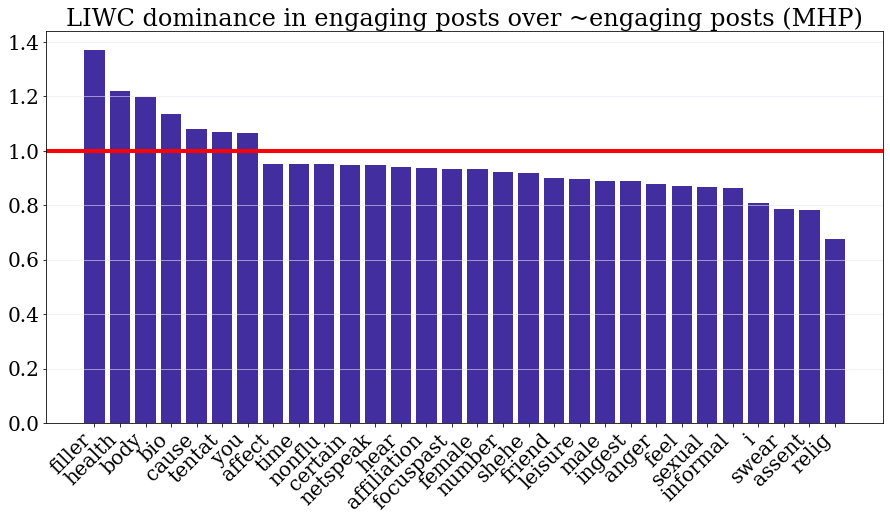

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})

fig, axs = plt.subplots(1, 1, figsize=(15, 8), sharey=False)
axs.set_title('LIWC dominance in engaging posts over ~engaging posts (MHP)')

xticklabels, bars = zip(*cats2plot_mhp)
xticks = range(1, len(bars) + 1)
yticks = [i/10 for i in range(int((min(bars) - .1) * 10), int((max(bars) + .1) * 10), 1)]

axs.set_xticks(range(1, len(bars) + 1), minor=False)
axs.set_xticklabels(xticklabels, minor=False)

axs.bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs.grid(axis='y', alpha=0.7, color='lavender')
axs.axhline(y=1, linewidth=4, color='red')


fig.autofmt_xdate(rotation=45)

bar_coordinates = [(x, y) for x,y in zip(xticks, bars)]

In [6]:
coordinates = "\n".join([f"\t({label},{y})" for (x,y), label in zip(bar_coordinates, xticklabels)])
print(f"coordinates {'{'} \n{coordinates}\n{'};'}")

xcoords=",".join(xticklabels)
print(f"symbolic x coords=({xcoords})")

print(f"ytick={'{'}{str(yticks)[1:-1]}{'}'}")

coordinates { 
	(filler,1.36949594883997)
	(health,1.2199518622464167)
	(body,1.1963945578342257)
	(bio,1.1361700435532716)
	(cause,1.0795619328576496)
	(tentat,1.0684715763913728)
	(you,1.0647948805231746)
	(affect,0.9522845831068245)
	(time,0.951763617594972)
	(nonflu,0.9511736159515903)
	(certain,0.9483112140262693)
	(netspeak,0.9463188721091431)
	(hear,0.9389897621251353)
	(affiliation,0.9356603838607893)
	(focuspast,0.9320867880328353)
	(female,0.9316496264858434)
	(number,0.9205180739190814)
	(shehe,0.9183051123944689)
	(friend,0.8982679230950419)
	(leisure,0.8969320017601855)
	(male,0.8902909716574792)
	(ingest,0.8876147841875968)
	(anger,0.8792607168322029)
	(feel,0.8702617564065059)
	(sexual,0.8668272078839938)
	(informal,0.8624389844393272)
	(i,0.8066956501832808)
	(swear,0.7870234652665543)
	(assent,0.7822245598953376)
	(relig,0.6755071110673626)
};
symbolic x coords=(filler,health,body,bio,cause,tentat,you,affect,time,nonflu,certain,netspeak,hear,affiliation,focuspast,femal

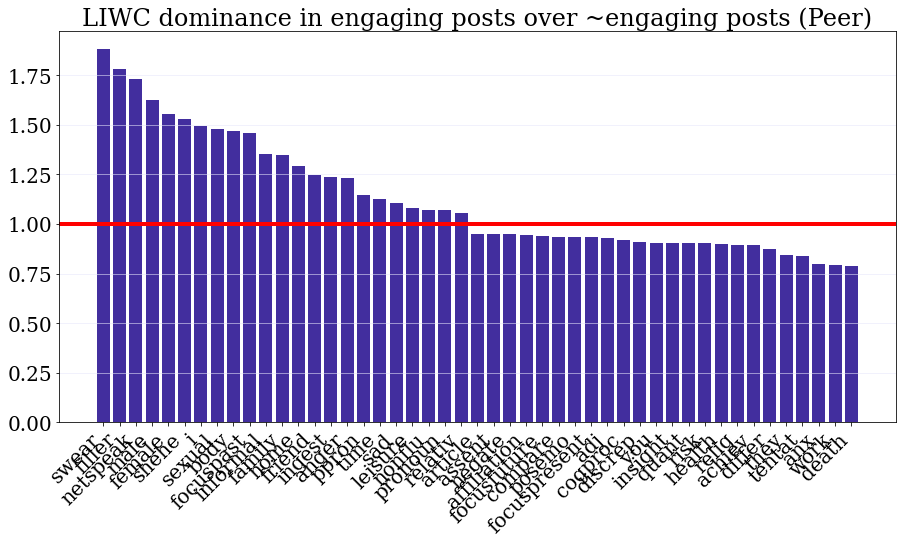

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})

fig, axs = plt.subplots(1, 1, figsize=(15, 8), sharey=False)
axs.set_title('LIWC dominance in engaging posts over ~engaging posts (Peer)')

xticklabels, bars = zip(*cats2plot_peer)
xticks = range(1, len(bars) + 1)
yticks = [i/10 for i in range(int((min(bars) - .1) * 10), int((max(bars) + .1) * 10), 1)]

axs.set_xticks(range(1, len(bars) + 1), minor=False)
axs.set_xticklabels(xticklabels, minor=False)

axs.bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs.grid(axis='y', alpha=0.7, color='lavender')
axs.axhline(y=1, linewidth=4, color='red')


fig.autofmt_xdate(rotation=45)

bar_coordinates = [(x, y) for x,y in zip(xticks, bars)]

In [8]:
coordinates = "\n".join([f"\t({label},{y})" for (x,y), label in zip(bar_coordinates, xticklabels)])
print(f"coordinates {'{'} \n{coordinates}\n{'};'}")

xcoords=",".join(xticklabels)
print(f"symbolic x coords=({xcoords})")

print(f"ytick={'{'}{str(yticks)[1:-1]}{'}'}")

coordinates { 
	(swear,1.879658444484982)
	(filler,1.7810593661619885)
	(netspeak,1.7293756118363766)
	(male,1.6256602426618532)
	(female,1.5548000204622026)
	(shehe,1.5295439668108781)
	(i,1.4916442275921695)
	(sexual,1.4799463808852678)
	(body,1.4666559653813842)
	(focuspast,1.4591346315434373)
	(informal,1.3530712011167025)
	(family,1.345526723369942)
	(home,1.2941990442182194)
	(friend,1.2466191780465534)
	(ingest,1.2364557884674052)
	(anger,1.231175315976077)
	(ppron,1.1485396641826071)
	(time,1.1252520261148176)
	(sad,1.1076581211470697)
	(leisure,1.0791055023879466)
	(nonflu,1.0706861814684128)
	(pronoun,1.0697634630622845)
	(relativ,1.0563931772355468)
	(article,0.9521936717286401)
	(assent,0.9490415798753398)
	(negate,0.9486672899619801)
	(affiliation,0.9459529926533995)
	(focusfuture,0.9395177906378953)
	(compare,0.9365048950246248)
	(posemo,0.9364354862214216)
	(focuspresent,0.9346811104664319)
	(adj,0.9316395220003558)
	(cogproc,0.9198302407327558)
	(discrep,0.9070653239916